## Softplus

In [1]:
import numpy as np
import matplotlib.pyplot as plt

engression_softplus_results = np.load('simresults2_engression.npz', allow_pickle=True)
results1 = engression_softplus_results['results_softplus1'].item()  
results2 = engression_softplus_results['results_softplus2'].item()

engression_softplus_results_L2 = np.load('simresults2_regression.npz', allow_pickle=True)
results1_L2 = engression_softplus_results_L2['results_softplus1'].item()  
results2_L2 = engression_softplus_results_L2['results_softplus2'].item()

### Beta Estimate

#### Case 1: Gaussian Error

In [2]:
engression_beta_estimates = results1['weight_estimates']
beta_mean_engression = engression_beta_estimates.mean(axis=0) 

regression_beta_estimates = results1_L2['weight_estimates']
beta_mean_regression = regression_beta_estimates.mean(axis=0) 

print('Engression weight mean estimate:', beta_mean_engression)
print('Regression weight mean estimate:', beta_mean_regression)

beta_var_engression = engression_beta_estimates.var(axis=0) 
beta_var_regression = regression_beta_estimates.var(axis=0) 

print('Engression weight variance estimate:', beta_var_engression)
print('Regression weight variance estimate:', beta_var_regression)

Engression weight mean estimate: [ 1.          0.11461793 -1.1364251  -0.4578907   0.26025754 -0.6929516
  0.04029833  0.50812554 -0.59478456 -0.47573057  0.2689134  -0.11746724
  0.29733863  0.01903444  0.6280871   0.45625386  0.9688597  -0.814565
 -0.35684556  0.04497844  0.20023963  0.8084432  -0.4032806   0.03422534
 -0.32607657 -0.3514546  -0.24527004  0.6349956  -0.44681153 -0.5015649
  0.9127309  -0.22385827  0.02436464  0.32710856  0.31584415  0.3611191
  0.18394917  0.29282635 -0.8261329   0.41132006 -0.62675625  0.23540254
 -0.36651102 -0.18879591 -0.12799329 -0.50934225 -0.76547724 -0.9196243
 -0.13476722 -0.8002756  -0.39265049  0.04587753  0.81579226  0.50701815
  0.50403535  0.14304993  0.29566285 -0.25114417 -0.07363842 -0.5021254
  0.8460309  -0.42439395  0.16481897 -1.0134718 ]
Regression weight mean estimate: [ 1.          0.8430041  -0.4477242  -1.4256198   0.35434335 -0.57949346
  0.5866129   0.12135863  0.27358547 -0.8110212   0.63202095 -0.44623384
  0.44898334 -0

#### Case 2: Uniform Error

In [3]:
engression_beta_estimates = results2['weight_estimates']
beta_mean_engression = engression_beta_estimates.mean(axis=0) 

regression_beta_estimates = results2_L2['weight_estimates']
beta_mean_regression = regression_beta_estimates.mean(axis=0) 

print('Engression weight mean estimate:', beta_mean_engression)
print('Regression weight mean estimate:', beta_mean_regression)

beta_var_engression = engression_beta_estimates.var(axis=0) 
beta_var_regression = regression_beta_estimates.var(axis=0) 

print('Engression weight variance estimate:', beta_var_engression)
print('Regression weight variance estimate:', beta_var_regression)

Engression weight mean estimate: [ 1.          0.00367498 -1.2315439  -0.31605285  0.37224382 -0.882055
  0.06547402  0.69059956 -0.59534925 -0.6899818  -0.02223394 -0.06493291
  0.5645495   0.10440731  0.33306435  0.5635705   0.9400135  -0.6263555
 -0.3051853   0.03937115  0.1717996   0.86641586 -0.35800323  0.03746369
 -0.22346263 -0.21321845 -0.33069462  0.46363193 -0.37226462 -0.4245673
  0.8632742  -0.02503103  0.0472463   0.41241136  0.21706367  0.1268043
  0.23197298  0.13425474 -0.83407557  0.39778447 -0.5178842   0.12768295
 -0.39153507  0.03080451 -0.01398367 -0.51694703 -0.62789166 -0.8953037
 -0.07771993 -0.67965305 -0.4076876  -0.07762039  0.8548579   0.65774614
  0.53938264  0.23647182  0.2951153  -0.34222412 -0.22775152 -0.56675416
  1.1263754  -0.29441306  0.16959648 -1.1396695 ]
Regression weight mean estimate: [ 1.          0.43285084 -0.3300529  -1.9625772   0.3920459  -0.58936155
  0.5376157   0.76227087 -0.03281821 -0.4522442   0.5957005  -0.06467662
 -0.06225461 -

### Estimate of function $g(\cdot)$, with true $\beta$

#### 1. Gaussian Error

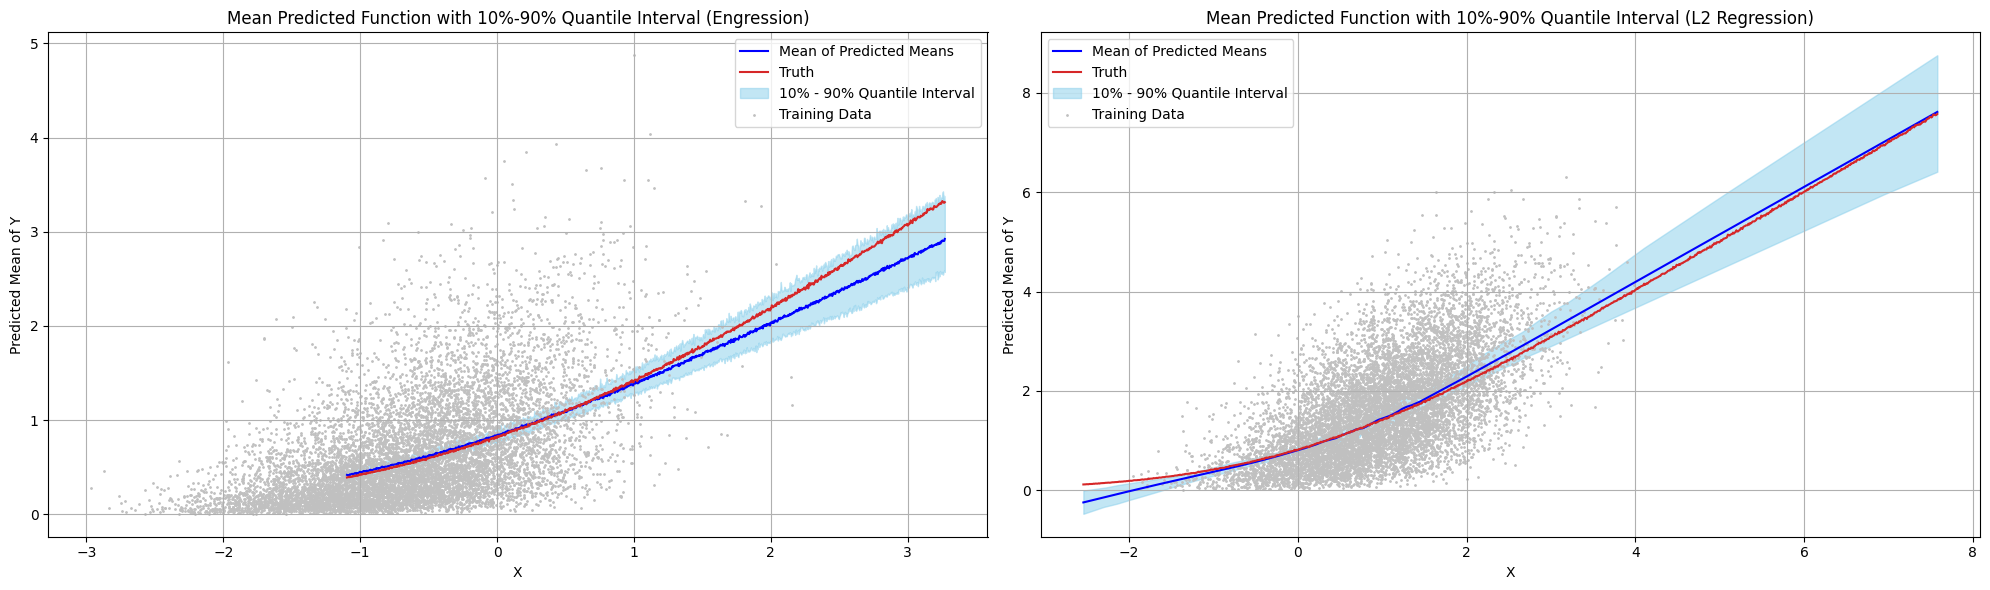

In [4]:
# Access the results
predicted_means = results1['predicted_funs_mean']                            
x_train = results1['x_train']
y_train = results1['y_train']
x_test = results1['x_test']   
y_true_mean = results1['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results1_L2['predicted_funs']                        
x_train_L2 = results1_L2['x_train']
y_train_L2 = results1_L2['y_train']
x_test_L2 = results1_L2['x_test']   
y_true_mean_L2 = results1_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


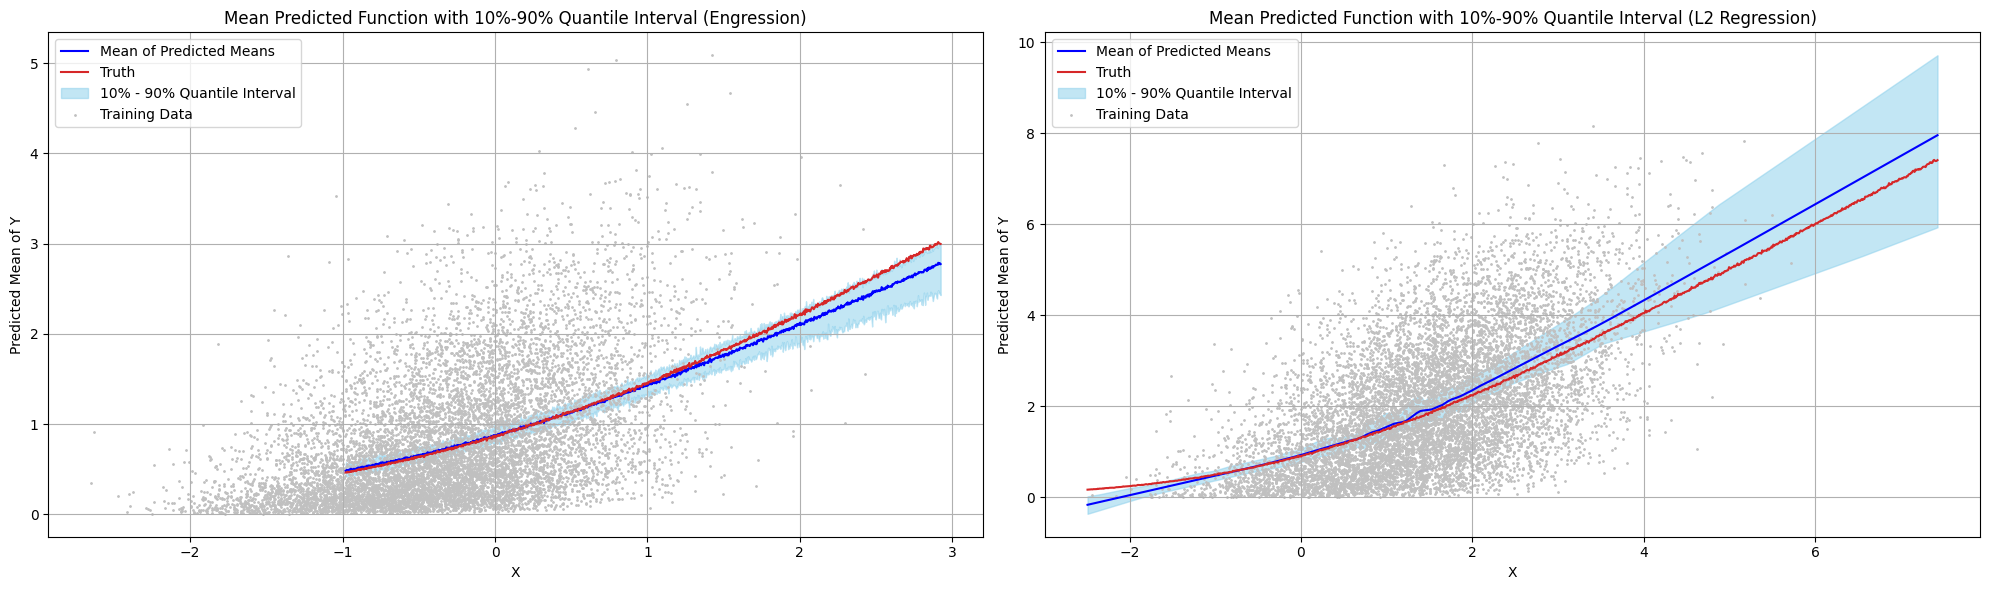

In [6]:
# Access the results
predicted_means = results2['predicted_funs_mean']                            
x_train = results2['x_train']
y_train = results2['y_train']
x_test = results2['x_test']   
y_true_mean = results2['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results2_L2['predicted_funs']                        
x_train_L2 = results2_L2['x_train']
y_train_L2 = results2_L2['y_train']
x_test_L2 = results2_L2['x_test']   
y_true_mean_L2 = results2_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Estimate of function $g(\cdot)$, with $\hat{\beta}$

#### 1. Gaussian Error

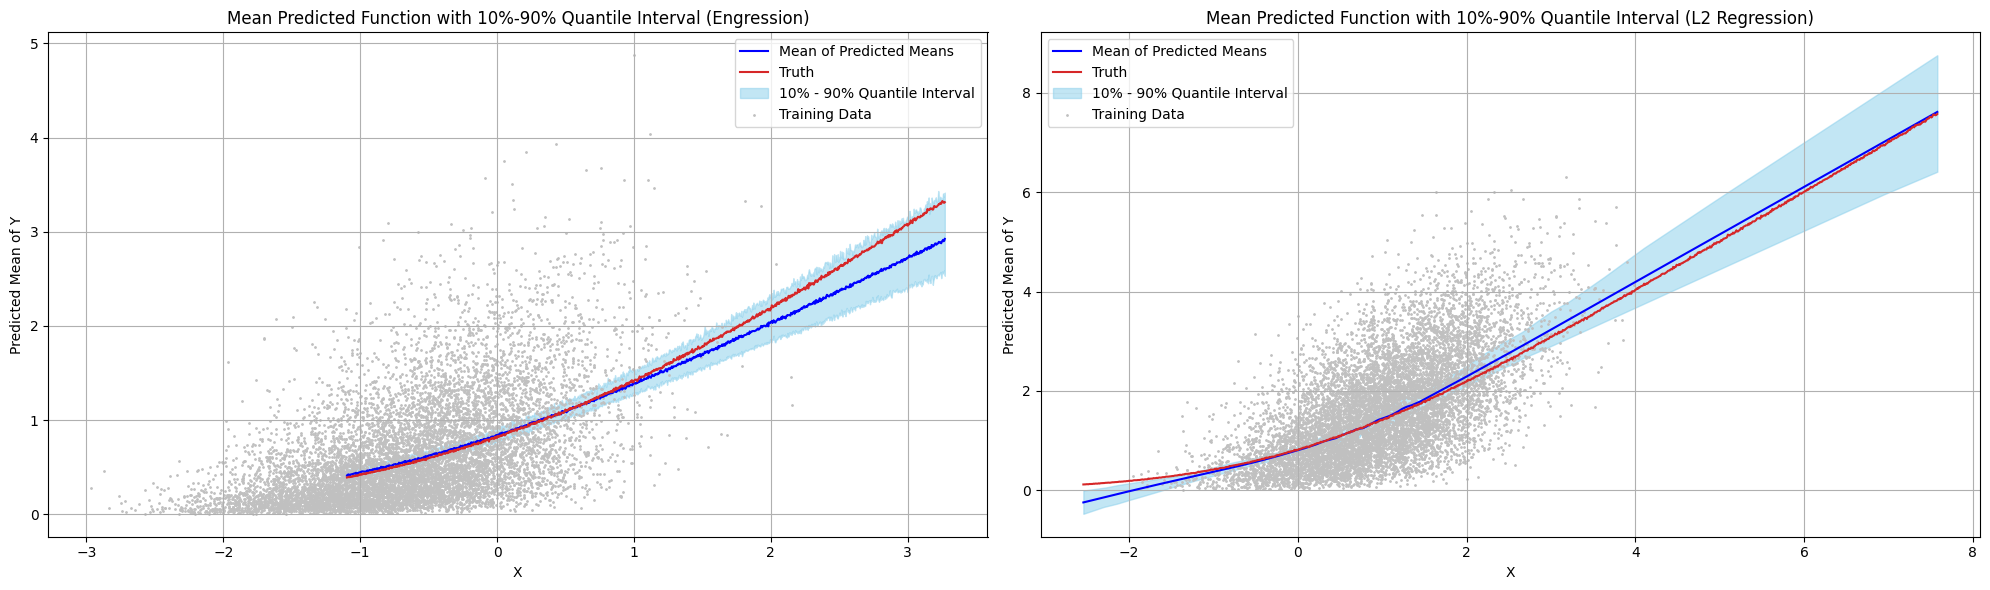

In [8]:
# Access the results
predicted_means = results1['predicted_means']                            
x_train = results1['x_train']
y_train = results1['y_train']
x_test = results1['x_test']   
y_true_mean = results1['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results1_L2['predicted_means']                        
x_train_L2 = results1_L2['x_train']
y_train_L2 = results1_L2['y_train']
x_test_L2 = results1_L2['x_test']   
y_true_mean_L2 = results1_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#### 2. Uniform Error 

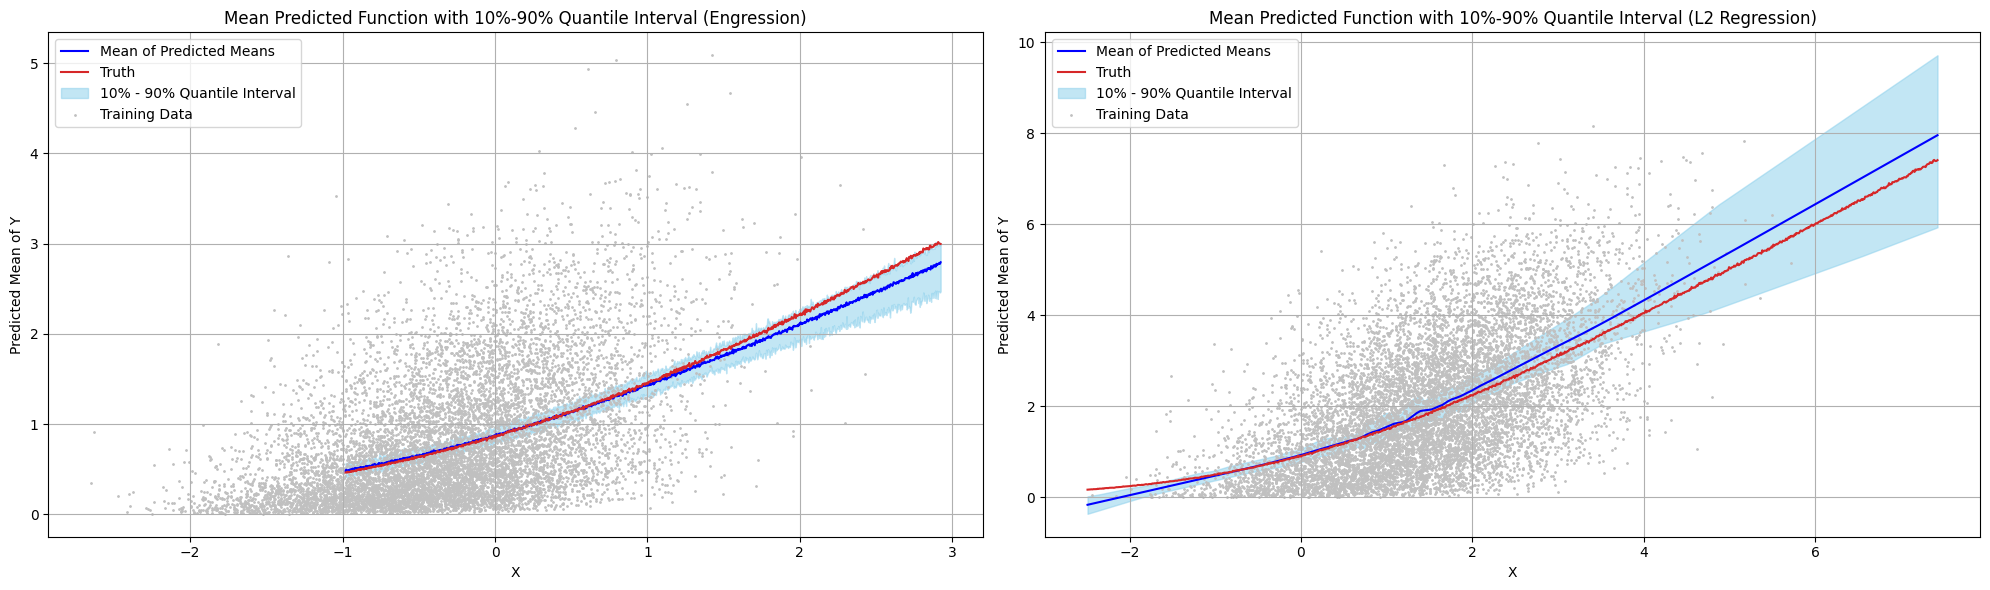

In [10]:
# Access the results
predicted_means = results2['predicted_means']                            
x_train = results2['x_train']
y_train = results2['y_train']
x_test = results2['x_test']   
y_true_mean = results2['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results2_L2['predicted_means']                        
x_train_L2 = results2_L2['x_train']
y_train_L2 = results2_L2['y_train']
x_test_L2 = results2_L2['x_test']   
y_true_mean_L2 = results2_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
